Importación de librerias y dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
%matplotlib inline
df = pd.read_csv('bank-full.csv', sep=';')


Análisis exploratorio

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
desc_stats = df.describe(include='all')
print(desc_stats)

                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [ ]:
scoring = 'accuracy'
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.883015
yes,0.116985


In [ ]:
df = df.drop('duration', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [ ]:
df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:

numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].std()

,0
age,10.618762
balance,3044.765829
day,8.322476
campaign,3.098021
pdays,100.128746
previous,2.303441


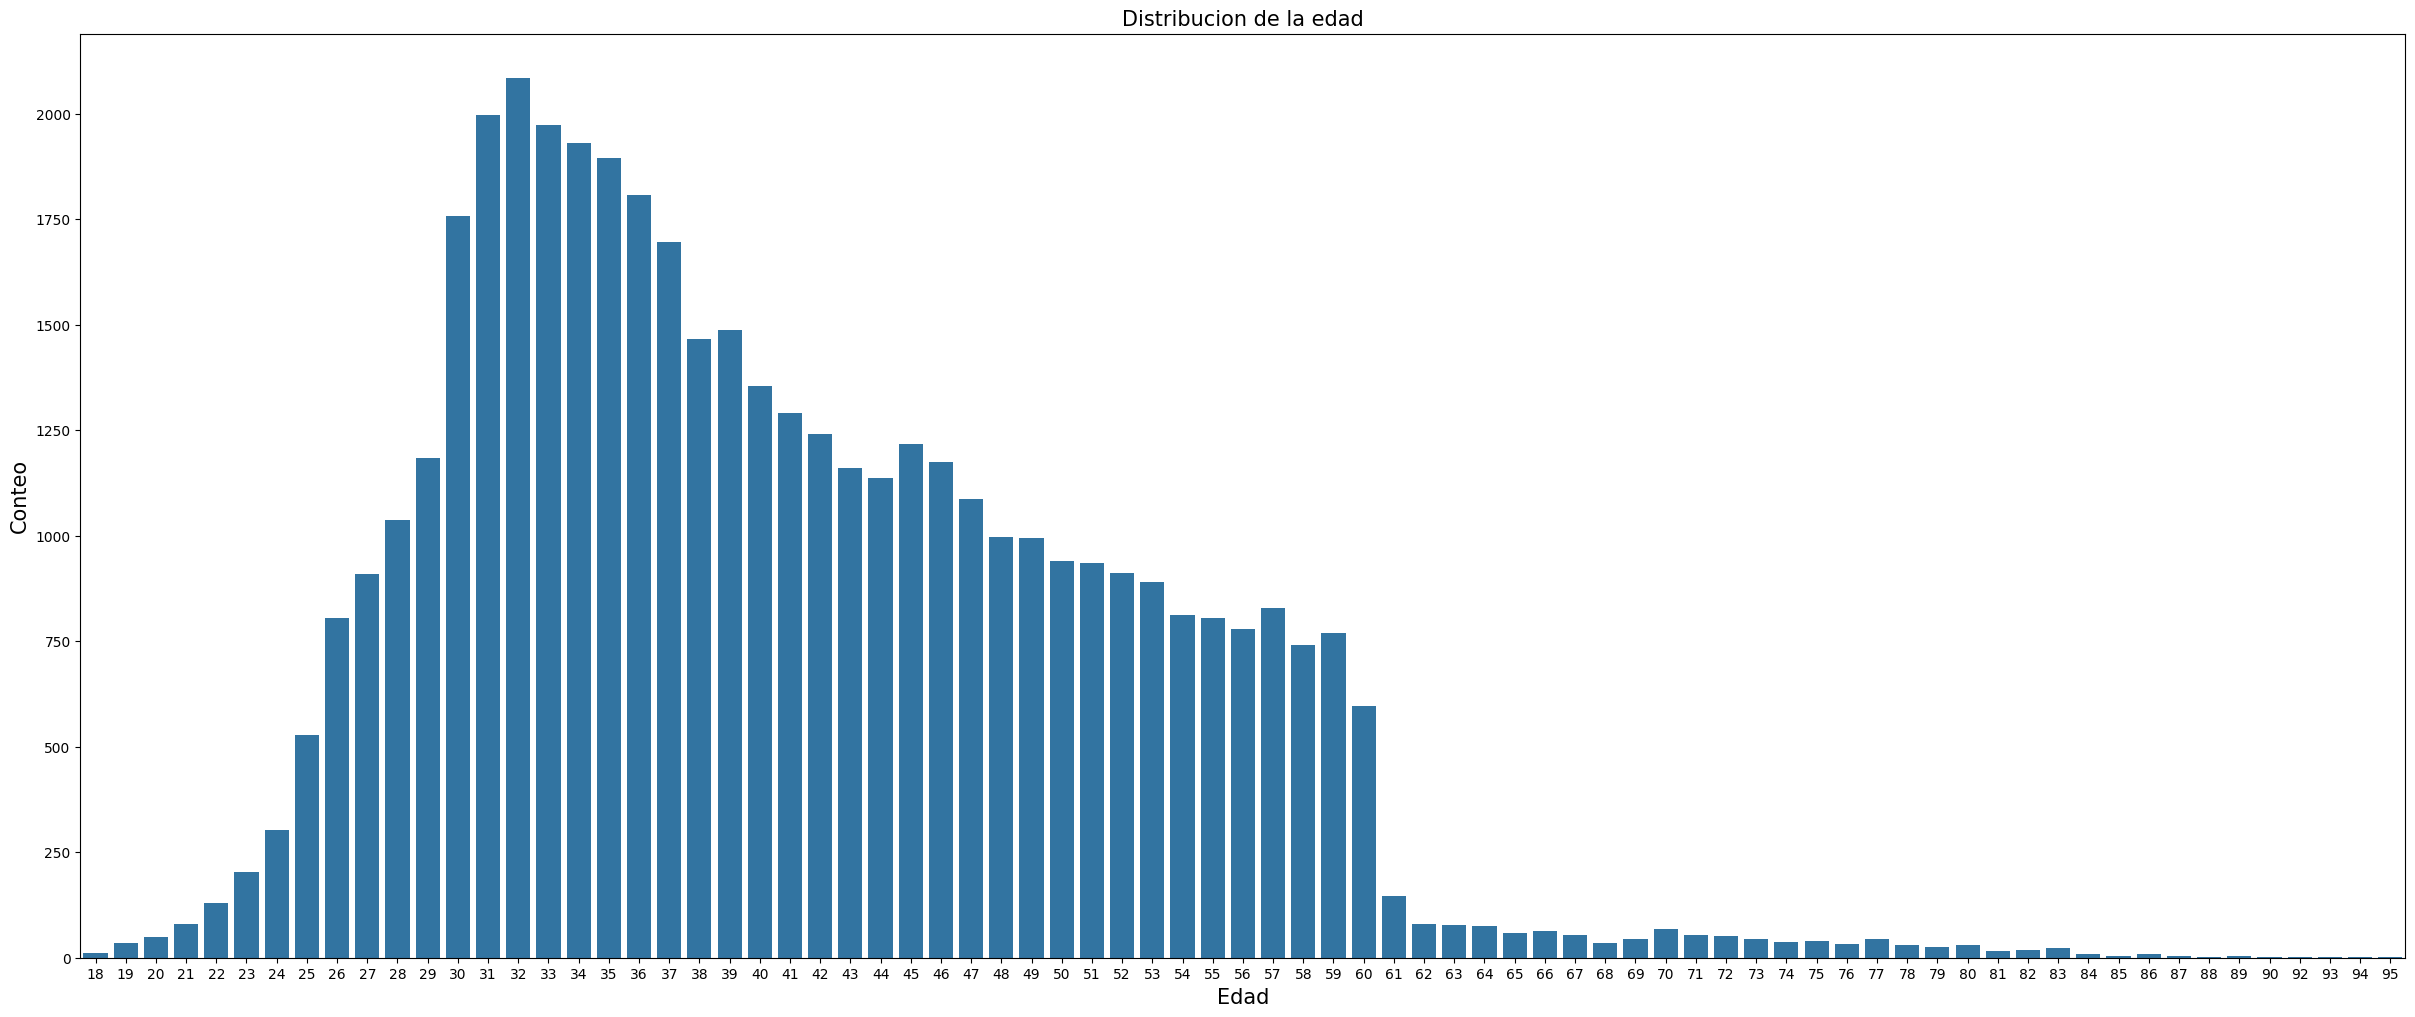

In [ ]:
plt.figure(figsize=(30, 12))
sns.countplot(x='age', data=df)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.title('Distribucion de la edad', fontsize=15)  #
plt.show()

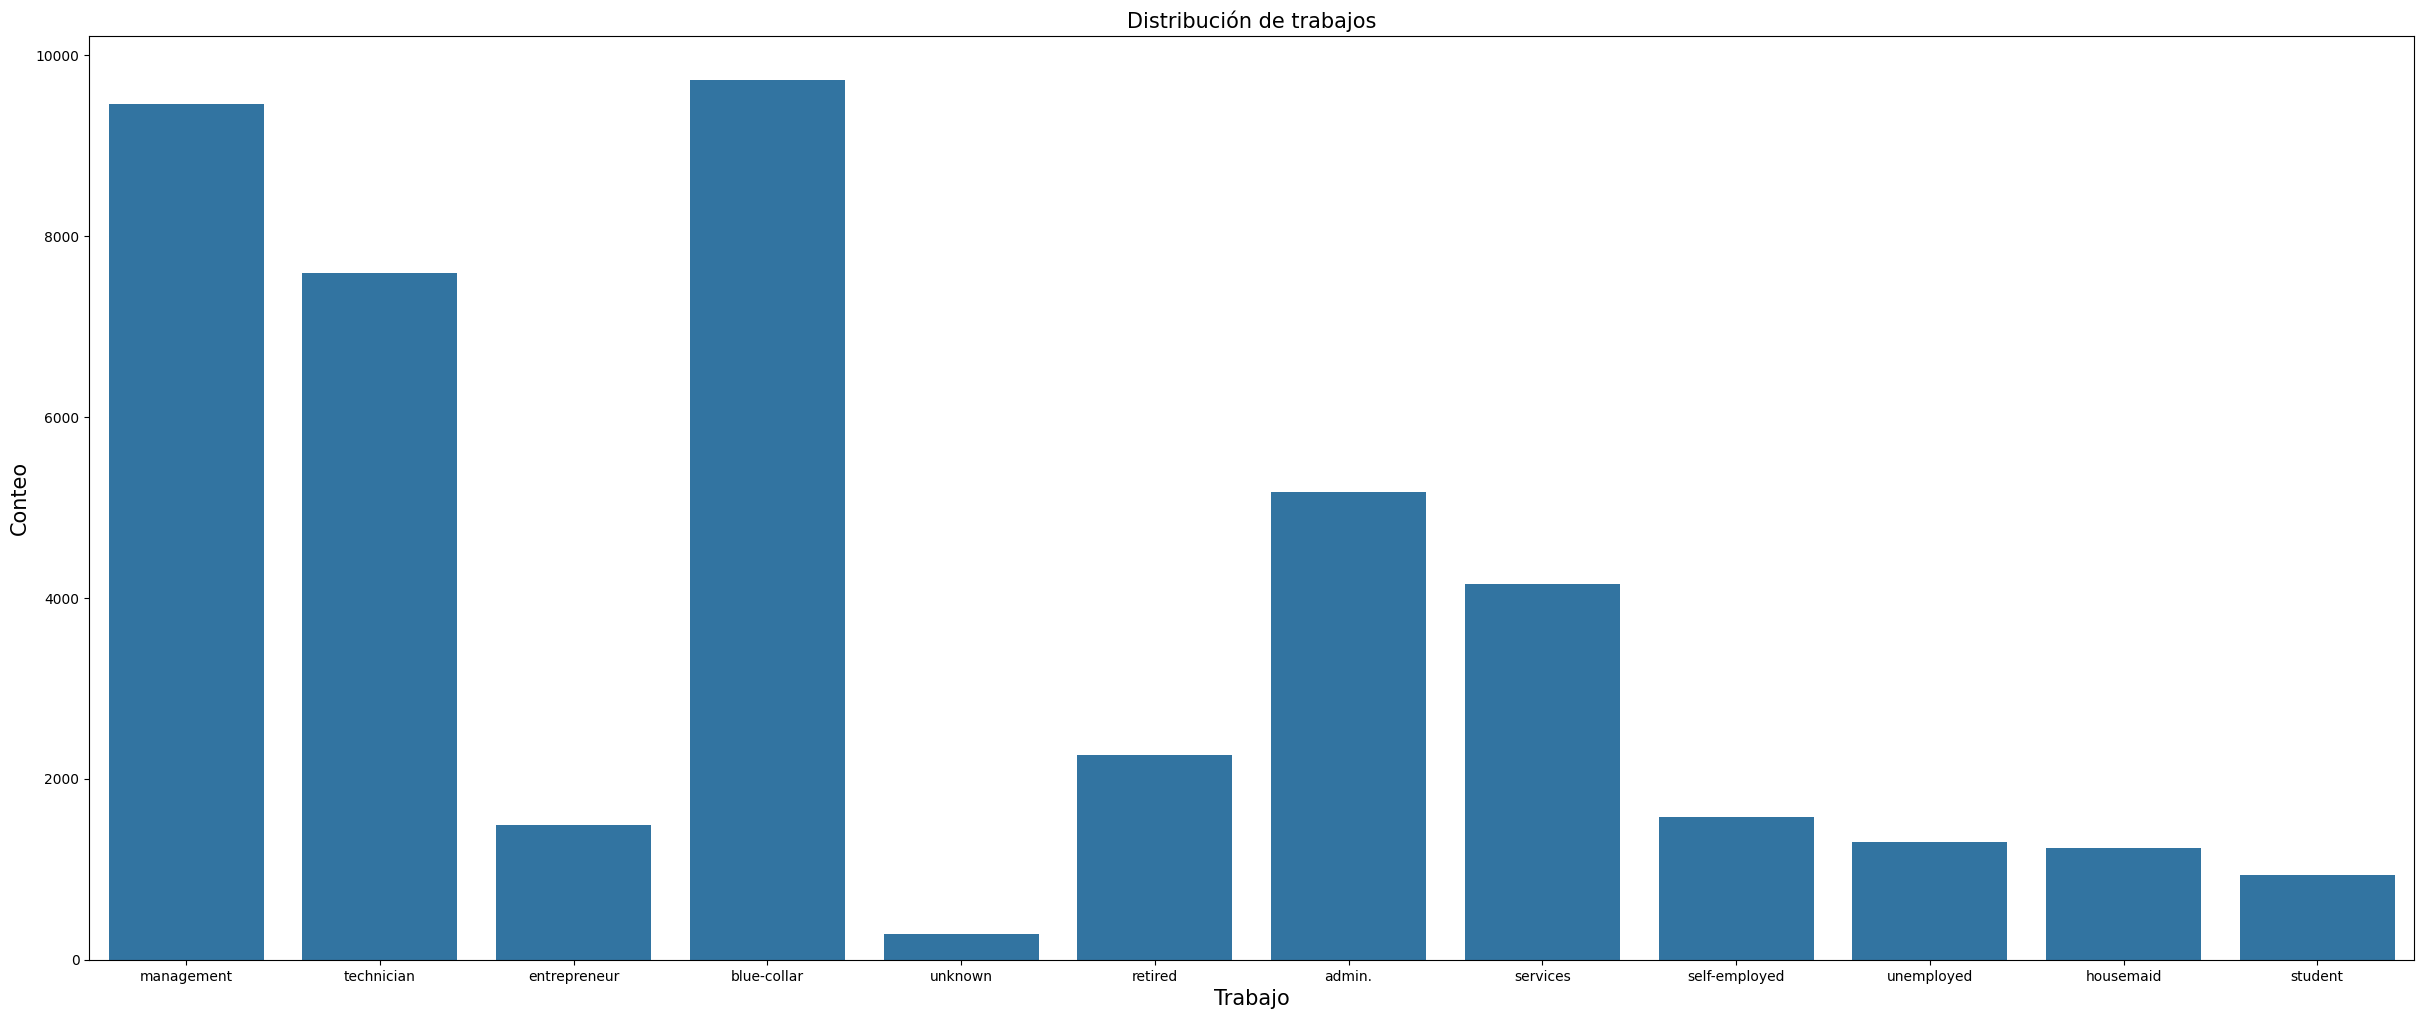

In [ ]:
plt.figure(figsize=(30, 12))
sns.countplot(x='job', data=df)
plt.xlabel('Trabajo', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.title('Distribución de trabajos', fontsize=15)
plt.show()

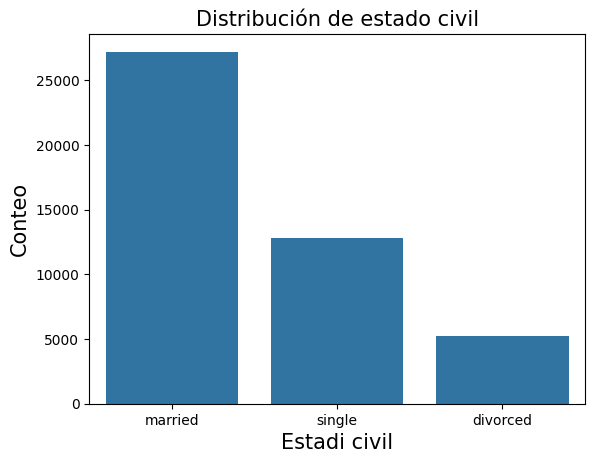

In [ ]:
sns.countplot(x='marital', data=df)
plt.xlabel('Estadi civil', fontsize=15)
plt.ylabel('Conteo', fontsize=15)
plt.title('Distribución de estado civil', fontsize=15)
plt.show()

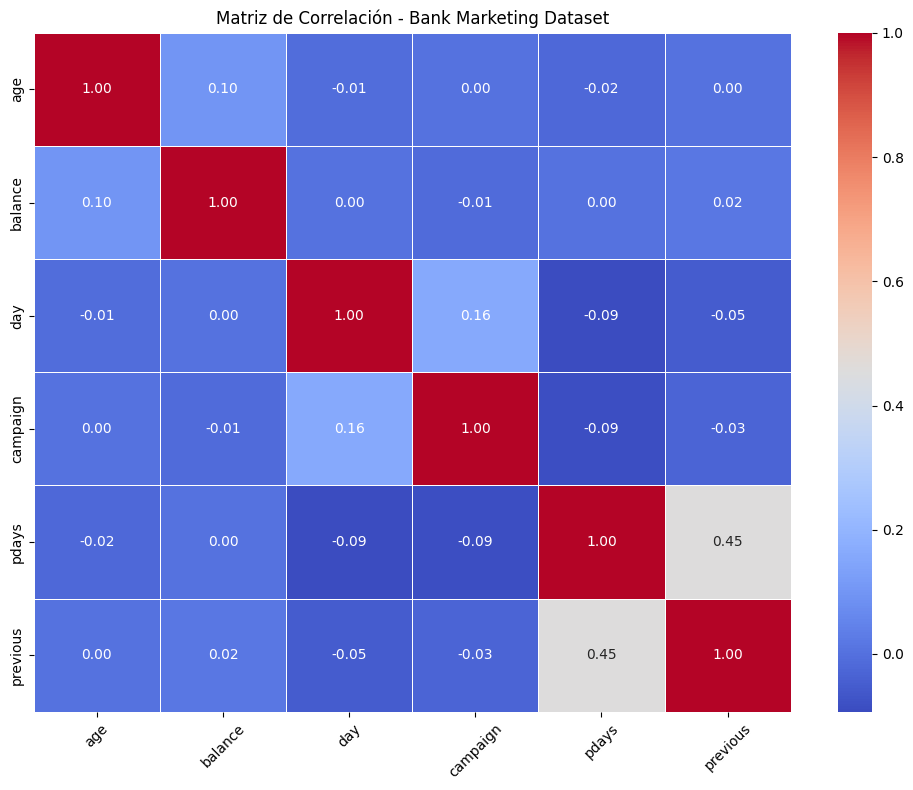

In [ ]:
num_df = df.select_dtypes(include='number')
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - Bank Marketing Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Preparación de data

In [ ]:
def pdays_binaria(df):
    df.loc[df['pdays'] < 40, 'pdays'] = 0
    df.loc[df['pdays'] >= 40, 'pdays'] = 1

    return df
pdays_binaria(df);


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'poutcome', 'y'
]


for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


def Duraciion_llamada_binaria(df):
  df.loc[df['duration'] < 257, 'duration'] = 0
  df.loc[df['duration'] >= 257, 'duration'] = 1

  return df
Duraciion_llamada_binaria(df);

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,0,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,0,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,0,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0,1,0,0,unknown,no


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,0,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,0,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,0,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,0,1,0,0,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


Ejecución de modelos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Primeras filas del dataset:")
print(df.head())


print("\nTamaño del dataset (filas, columnas):", df.shape)


X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

print("\nTamaño de X_train:", X_train.shape)
print("Tamaño de X_test: ", X_test.shape)


gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_clf.fit(X_train, y_train)


y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}\n")
print("Reporte de clasificación:")
print(report)
print("Matriz de Confusión:")
print(cm)


Primeras filas del dataset:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8         1         1      0         0         3  0  
1    5      8         0         1      0         0         3  0  
2    5      8         0         1      0         0         3  0  
3    5      8         0         1      0         0         3  0  
4    5      8         0         1      0         0         3  0  

Tamaño del dataset (filas, columnas): (45211, 17)

Tamaño de X_train: (33908, 16)
Tamaño de X_test:  (11303, 16)

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Primeras filas del dataset:")
print(df.head())


X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

print("\nTamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}\n")
print("Reporte de clasificación:")
print(report)
print("Matriz de Confusión:")
print(cm)


Primeras filas del dataset:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8         1         1      0         0         3  0  
1    5      8         0         1      0         0         3  0  
2    5      8         0         1      0         0         3  0  
3    5      8         0         1      0         0         3  0  
4    5      8         0         1      0         0         3  0  

Tamaño de X_train: (33908, 16)
Tamaño de X_test: (11303, 16)
Accuracy: 0.8949

Reporte de clasificación:
       

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Primeras filas del dataset:")
print(df.head())


X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("\nTamaño de X_train:", X_train.shape)
print("Tamaño de X_test: ", X_test.shape)

log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}\n")
print("Reporte de clasificación:")
print(report)
print("Matriz de Confusión:")
print(cm)

Primeras filas del dataset:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8         1         1      0         0         3  0  
1    5      8         0         1      0         0         3  0  
2    5      8         0         1      0         0         3  0  
3    5      8         0         1      0         0         3  0  
4    5      8         0         1      0         0         3  0  

Tamaño de X_train: (33908, 16)
Tamaño de X_test:  (11303, 16)
Accuracy: 0.8824

Reporte de clasificación:
      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Importancia de las variables

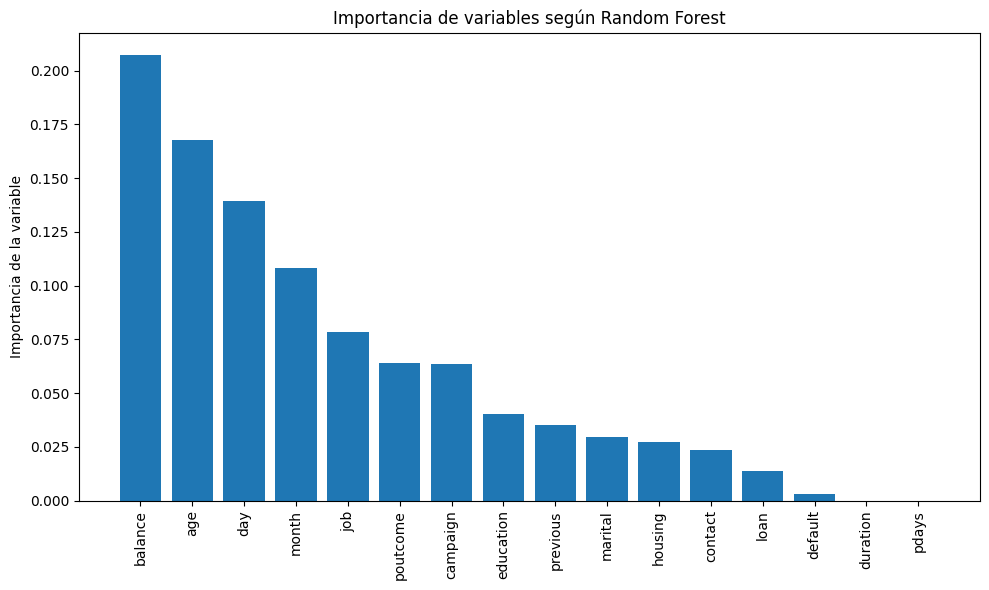

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.ylabel('Importancia de la variable')
plt.title('Importancia de variables según Random Forest')
plt.tight_layout()
plt.show()
